In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# We'll need to update our path to import from Drive.
import sys
sys.path.append('/content/drive/MyDrive/Maestria/2021.04.CyT/TP-grupo-2')

## Importar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import matplotlib.gridspec as gridspec
from scipy.signal import butter, lfilter
from sklearn import decomposition


In [ ]:
!pip install mne
import mne

     |████████████████████████████████| 6.9 MB 6.7 MB/s 


## Levantar dataset

In [ ]:
filename = '/content/drive/MyDrive/Maestria/2021.04.CyT/TP-grupo-2/procesados/suj_8_bl_2.txt'
datos = pd.read_csv(filename, sep=',', header=None)
EEGdata = datos.to_numpy()
srate=128
ch    = EEGdata.shape[0]
samples = EEGdata.shape[1] 

inicio = 1
fin    = int(samples/srate)

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEGdata.shape[1], EEGdata.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


Los registros fueron tomados con el montage 10-20. Tengo que armarlo que los electrodos tengan esta distribución:
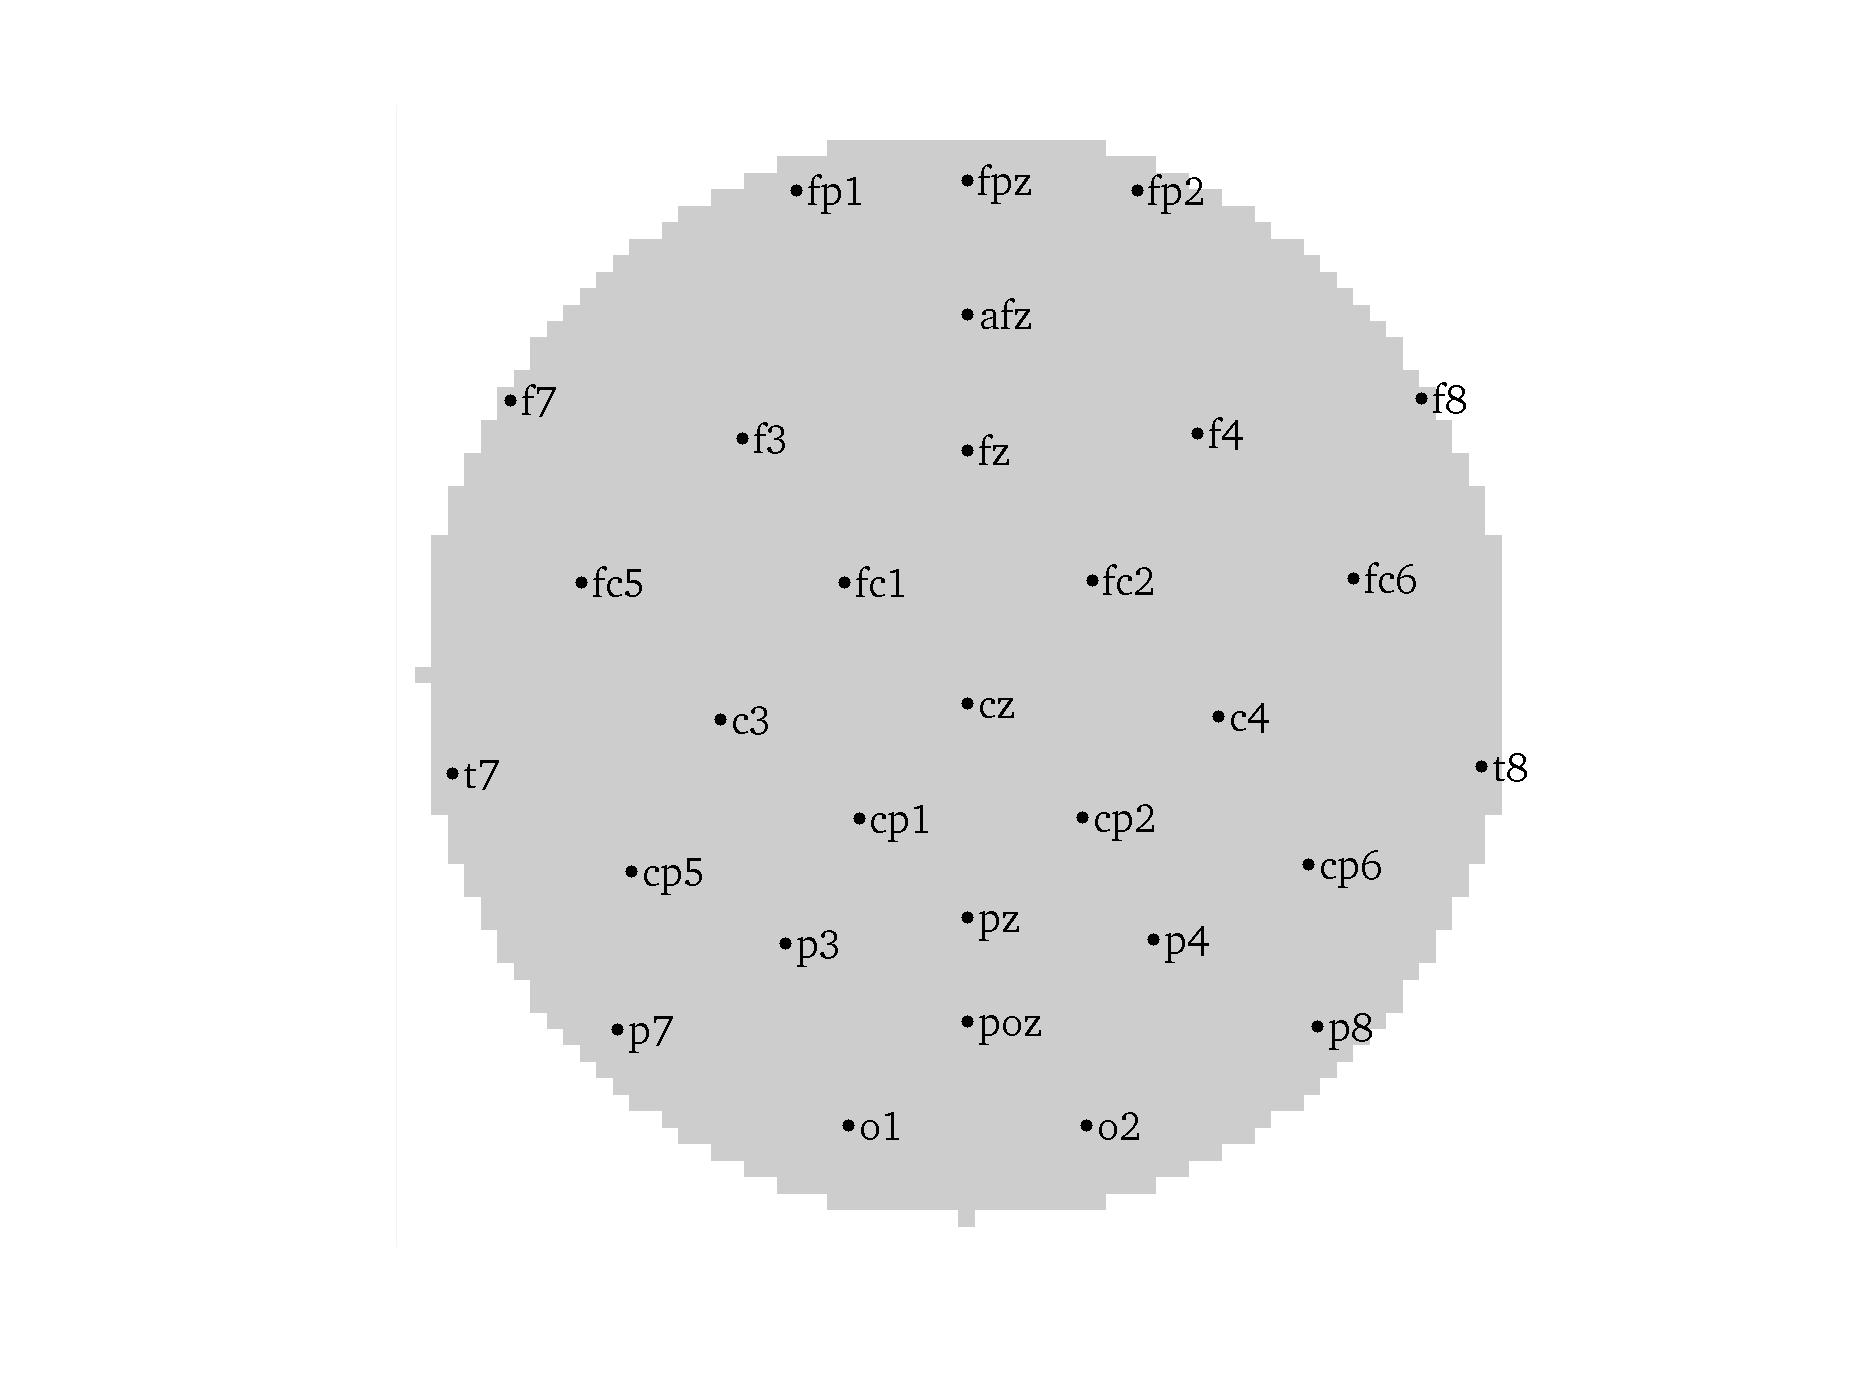

In [ ]:
# Montage 10-20
mont1020 = mne.channels.make_standard_montage('standard_1020')
# Elijo canales que tengo
kept_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 
                 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'FC1', 'FC2',
                 'FC5', 'FC6','CP1','CP2','CP5','CP6','AFz','Fpz','POz']

ind = [i for (i, channel) in enumerate(mont1020.ch_names) if channel in kept_channels]
mont1020_30 = mont1020.copy()
# Me quedo solo con los canales seleccionados
mont1020_30.ch_names = [mont1020.ch_names[x] for x in ind]
kept_channel_info = [mont1020.dig[x+3] for x in ind]
# Me quedo con las referencias desde dónde están ubicados los canales
mont1020_30.dig = mont1020.dig[0:3]+kept_channel_info
info_eeg = mne.create_info(ch_names=mont1020_30.ch_names, sfreq=128,
                            ch_types='eeg').set_montage(mont1020_30)

/content/drive/MyDrive/Maestria/2021.04.CyT/TP-grupo-2/procesados/suj_8_bl_1.txt


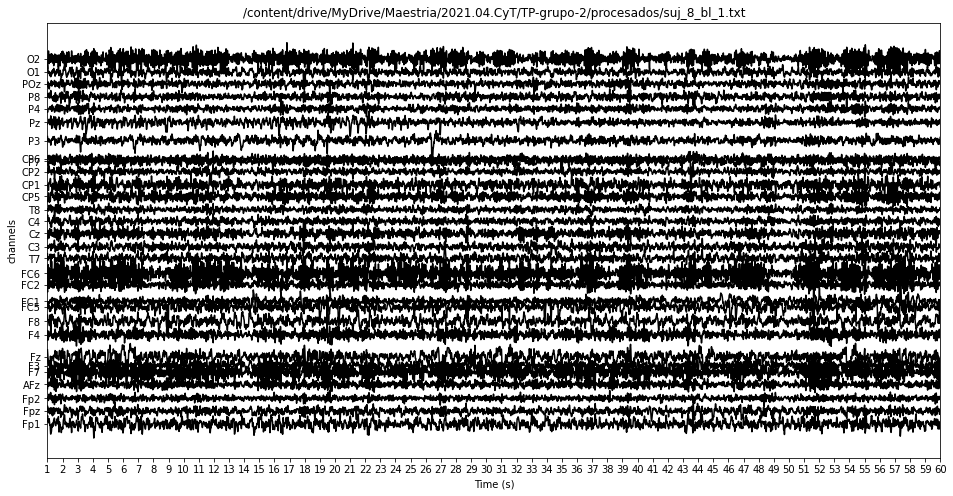

/content/drive/MyDrive/Maestria/2021.04.CyT/TP-grupo-2/procesados/suj_8_bl_2.txt


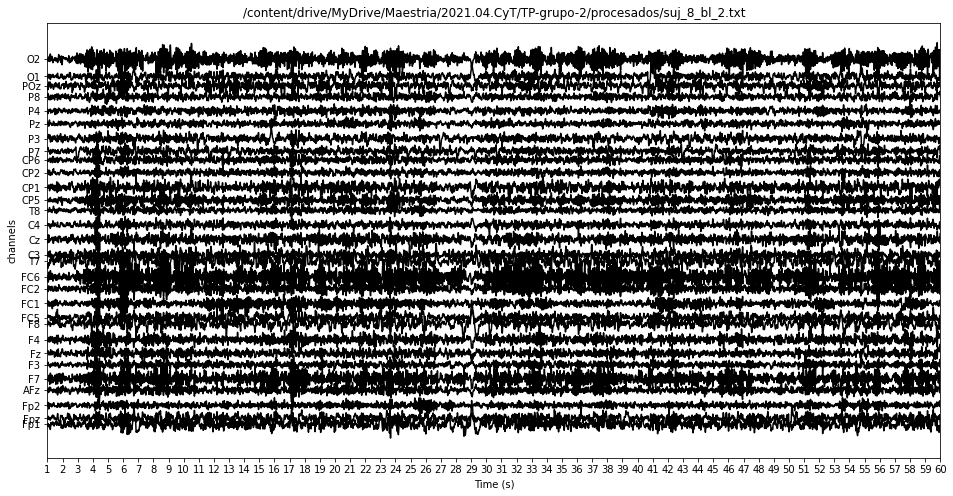

In [ ]:
for sujeto in [8]: #, 9, 10, 11]:
  for act in [1, 2]:
    filename = f'/content/drive/MyDrive/Maestria/2021.04.CyT/TP-grupo-2/procesados/suj_{sujeto}_bl_{act}.txt'
    print(filename)

    datos = pd.read_csv(filename, sep=',', header=None)
    EEGdata = datos.to_numpy()


    xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
    fig,ax = plt.subplots(ncols=1,figsize=(16,8))
    #fig.suptitle('Series temporales (uV)')
    yticks=[]
    for c in np.arange(ch):
        # temp = EEGdata_filt[c,inicio*srate:fin*srate]
        temp2= EEGdata[c,inicio*srate:fin*srate]
        dmin=np.min(temp2)
        dmax=np.max(temp2)
        vmedio = np.mean([dmin,dmax])+30*c
        yticks.append(vmedio)
        # ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'--r')
        ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp2)+temp2,'k')
    ax.set_title(filename)

    ax.set_xlim([inicio*srate,fin*srate])
    ax.set_xticks(xticks)
    ax.set_xticklabels(np.arange(inicio,fin+1))
    ax.set_yticks(yticks)
    ax.set_yticklabels(mont1020_30.ch_names)
    ax.set_ylabel('channels')
    ax.set_xlabel('Time (s)')
      

    plt.show()

### Topologia

/content/drive/MyDrive/Maestria/2021.04.CyT/TP-grupo-2/procesados/suj_8_bl_1.txt


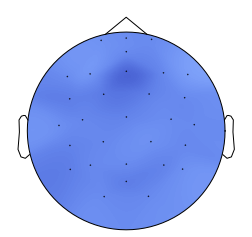

/content/drive/MyDrive/Maestria/2021.04.CyT/TP-grupo-2/procesados/suj_8_bl_2.txt


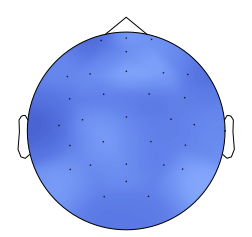

0.0818687024161356
----------------------------------


In [ ]:
for sujeto in [8]: #, 9, 10, 12, 13]:
  promedios = []
  for act in [1, 2]:
    filename = f'/content/drive/MyDrive/Maestria/2021.04.CyT/TP-grupo-2/procesados/suj_{sujeto}_bl_{act}.txt'
    print(filename)

    datos = pd.read_csv(filename, sep=',', header=None)
    EEGdata = datos.to_numpy()
    
    fig, ax = plt.subplots( figsize=(8, 4), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)
    
    # print("Promedios: ")
    # print(EEGdata[:,inicio*srate:fin*srate].mean(axis=1))

    promedios.append(EEGdata[:,inicio*srate:fin*srate].mean(axis=1))
    
    im,cm   = mne.viz.plot_topomap(EEGdata[:,inicio*srate:fin*srate].mean(axis=1),info_eeg,vmin=-0.05,vmax=0.3,
                        cmap='coolwarm', contours=0, show=True)
    ax.set_title(filename)
    ax_x_start = 0.95
    ax_x_width = 0.04
    ax_y_start = 0.1
    ax_y_height = 0.9
    cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    clb = fig.colorbar(im, cax=cbar_ax)
    # clb.ax.set_title(filename,fontsize=12) # title on top of colorbar
    # plt.show()     

  # print("promedios")
  # print(promedios)
  dist = np.linalg.norm(promedios[0]-promedios[1])
  print(dist)
  print("----------------------------------")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


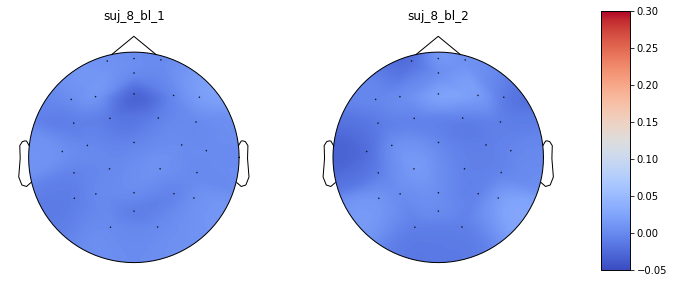

diferencia en distancia euclediana de los promedios: 0.08187
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


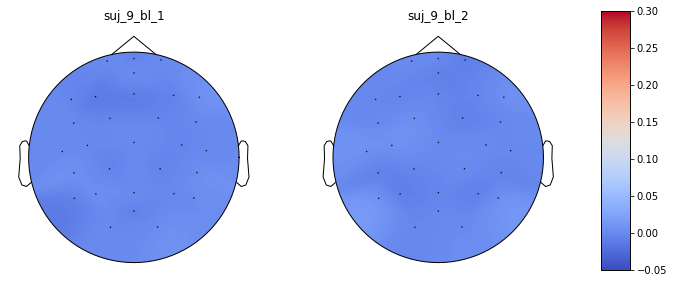

diferencia en distancia euclediana de los promedios: 0.03005
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


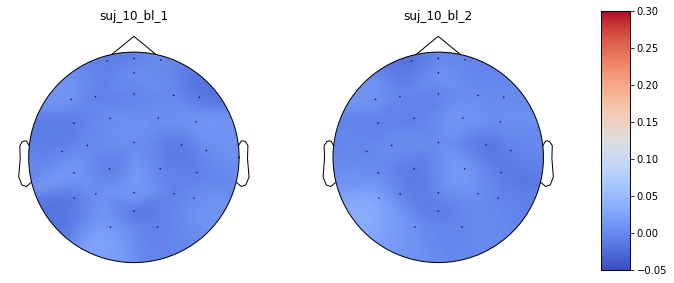

diferencia en distancia euclediana de los promedios: 0.04622
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


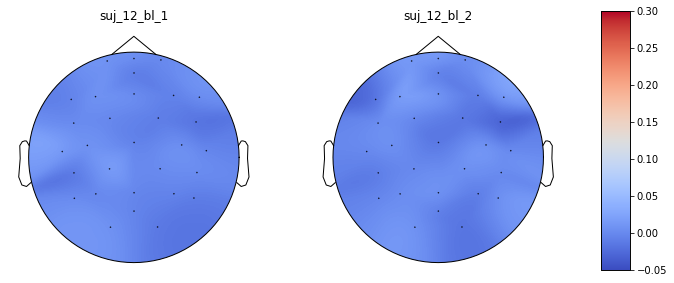

diferencia en distancia euclediana de los promedios: 0.03874
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


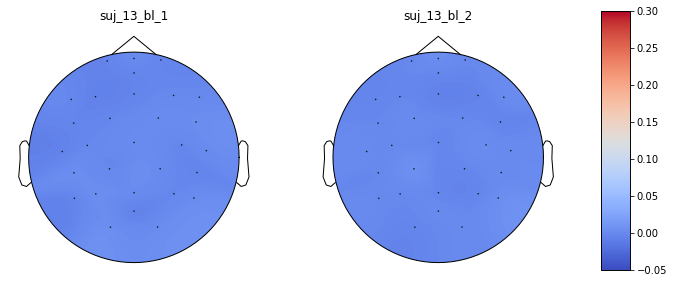

diferencia en distancia euclediana de los promedios: 0.0197
----------------------------------------------------------------------------------------------


In [ ]:

for sujeto in [8, 9, 10, 12, 13]:
  promedios = []
  fig, axs = plt.subplots(
                        nrows=1, 
                        ncols=2, 
                        figsize=(10, 4), 
                        # gridspec_kw=dict(top=0.9),
                        # sharex=True, 
                        # sharey=True
                        )
  for act in [1, 2]:
    ax = axs[act-1]
    filename = f'/content/drive/MyDrive/Maestria/2021.04.CyT/TP-grupo-2/procesados/suj_{sujeto}_bl_{act}.txt'

    datos = pd.read_csv(filename, sep=',', header=None)
    EEGdata = datos.to_numpy()
    
    # fig, ax = plt.subplots( figsize=(8, 4), gridspec_kw=dict(top=0.9),
    #                    sharex=True, sharey=True)
    
    # print("Promedios: ")
    # print(EEGdata[:,inicio*srate:fin*srate].mean(axis=1))

    promedios.append(EEGdata[:,inicio*srate:fin*srate].mean(axis=1))
    
    im,cm   = mne.viz.plot_topomap(EEGdata[:,inicio*srate:fin*srate].mean(axis=1),
                                   info_eeg,
                                   axes=ax,
                                   vmin=-0.05,
                                   vmax=0.3,
                                   cmap='coolwarm', 
                                   contours=0, 
                                   show=False)
    
    ax.set_title(f"suj_{sujeto}_bl_{act}")
    ax_x_start = 0.95
    ax_x_width = 0.04
    ax_y_start = 0.1
    ax_y_height = 0.9
    cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    clb = fig.colorbar(im, cax=cbar_ax)
  plt.show()

  # print("promedios")
  # print(promedios)
  dist = np.linalg.norm(promedios[0]-promedios[1])
  print(f"diferencia en distancia euclediana de los promedios: {round(dist, 5)}")
  print("----------------------------------------------------------------------------------------------")

### PCA

Calcular las componentes principales para el total de los datos (concatenados en el tiempo). ¿Qué peso tiene cada proyección en los distintos períodos de reposo? 


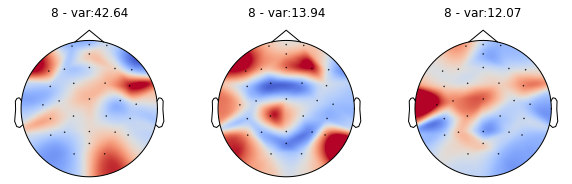

Sujeto: 8
pca.components_[0]
Suma componentes, 1°: 0.09389261993033485, 2°: -0.09189089644686091
Media componentes, 1°: 2.486563027816071e-05, 2°: -2.4335512830206808e-05
----------------------------------------------------------------------------------------------
pca.components_[1]
Suma componentes, 1°: 0.23843247877518076, 2°: -0.07111527068335105
Media componentes, 1°: 6.314419459088474e-05, 2°: -1.8833493295378986e-05
----------------------------------------------------------------------------------------------
pca.components_[2]
Suma componentes, 2°: -0.04835763381329171, 2°: -0.0645855818195114
Media componentes, 2°: -1.2806576751401406e-05, 2°: -1.7104232473387553e-05
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------


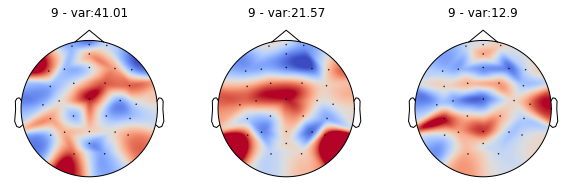

Sujeto: 9
pca.components_[0]
Suma componentes, 1°: 0.0036601269385826765, 2°: -0.03318136867060441
Media componentes, 1°: 9.693132782263444e-07, 2°: -8.787438736918541e-06
----------------------------------------------------------------------------------------------
pca.components_[1]
Suma componentes, 1°: 0.06378130797893733, 2°: 0.04649878821073417
Media componentes, 1°: 1.689123622323552e-05, 2°: 1.2314297725300364e-05
----------------------------------------------------------------------------------------------
pca.components_[2]
Suma componentes, 2°: -0.05559871275611552, 2°: 2.7557915905571106e-05
Media componentes, 2°: -1.4724235369733982e-05, 2°: 7.298176881772009e-09
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------


In [ ]:

for sujeto in [8, 9]: #, 10, 12, 13]:
  filename = f"/content/drive/MyDrive/Maestria/2021.04.CyT/TP-grupo-2/procesados/suj_{sujeto}_bl_{act}.txt"
  datos1 = pd.read_csv(filename.format(sujeto=sujeto, act=1), sep=',', header=None)
  datos2 = pd.read_csv(filename.format(sujeto=sujeto, act=2), sep=',', header=None)
  EEGdata1 = datos1.to_numpy()
  EEGdata2 = datos2.to_numpy()

  srate=128
  ch    = EEGdata1.shape[0]
  samples = EEGdata1.shape[1] 

  # lowcut = 2
  # highcut = 20
  # order = 6
  # EEGdata_filt1 = np.zeros_like(EEGdata1)
  # EEGdata_filt2 = np.zeros_like(EEGdata2)
  
  # for i,temp_canal in enumerate(EEGdata1):
  #   EEGdata_filt1[i,:] = butter_bandpass_filter(temp_canal, lowcut, highcut, srate, order)

  # for i,temp_canal in enumerate(EEGdata2):
  #   EEGdata_filt2[i,:] = butter_bandpass_filter(temp_canal, lowcut, highcut, srate, order)

  EEGdata_filt_sum = EEGdata1[:,inicio*srate:fin*srate] + EEGdata2[:,inicio*srate:fin*srate]

  pca = decomposition.PCA(n_components=3)
  pca.fit(EEGdata_filt_sum)
  pcs = pca.transform(EEGdata_filt_sum)
  var = pca.explained_variance_ratio_
  fig2, ax = plt.subplots(ncols=pcs.shape[1], figsize=(10, 3), gridspec_kw=dict(top=0.9),
                        sharex=True, sharey=True)
  for p in range(pcs.shape[1]):
    mne.viz.plot_topomap(pcs[:,p],
                      info_eeg,
                      cmap='coolwarm', contours=0,
                      axes=ax[p],show=False)
    ax[p].set_title(str(sujeto) + ' - var:'+str(round(var[p]*100,2)) )   
  plt.show()
  
  print(f"Sujeto: {sujeto}")
  print("pca.components_[0]")
  componente_0 = pca.components_[0]
  print(f"Suma componentes, 1°: {componente_0[len(componente_0 )//2:].sum()}, 2°: {componente_0[:len(componente_0)//2].sum()}" )
  print(f"Media componentes, 1°: {componente_0[len(componente_0 )//2:].mean()}, 2°: {componente_0[:len(componente_0)//2].mean()}" )
  print("----------------------------------------------------------------------------------------------")
  print("pca.components_[1]")
  componente_1 = pca.components_[1]
  print(f"Suma componentes, 1°: {componente_1[len(componente_1 )//2:].sum()}, 2°: {componente_1[:len(componente_1)//2].sum()}" )
  print(f"Media componentes, 1°: {componente_1[len(componente_1 )//2:].mean()}, 2°: {componente_1[:len(componente_1)//2].mean()}" )
  print("----------------------------------------------------------------------------------------------")
  print("pca.components_[2]")
  componente_2 = pca.components_[2]
  print(f"Suma componentes, 2°: {componente_2[len(componente_2 )//2:].sum()}, 2°: {componente_2[:len(componente_2)//2].sum()}" )
  print(f"Media componentes, 2°: {componente_2[len(componente_2 )//2:].mean()}, 2°: {componente_2[:len(componente_2)//2].mean()}" )
  print("----------------------------------------------------------------------------------------------")
  print("----------------------------------------------------------------------------------------------")


In [ ]:
# 3 componentes
# len(pca.components_)
# 7552 'features' que corresponden a cada fragmento de tiempo
len(pca.components_[0])

7552

### Campo de Potencia Global

Encontrar los picos del GFP. Guardar los vectores del GFP para los máximos encontrados.



Sujeto: 8

 Período: 1
Shape EEGdata_pre  (30, 7681)
Shape EEGdata_pre  (30, 7681)
Shape EEGdata  (30, 15362)
Dimensionalidad: 15362
Len de output: 15362


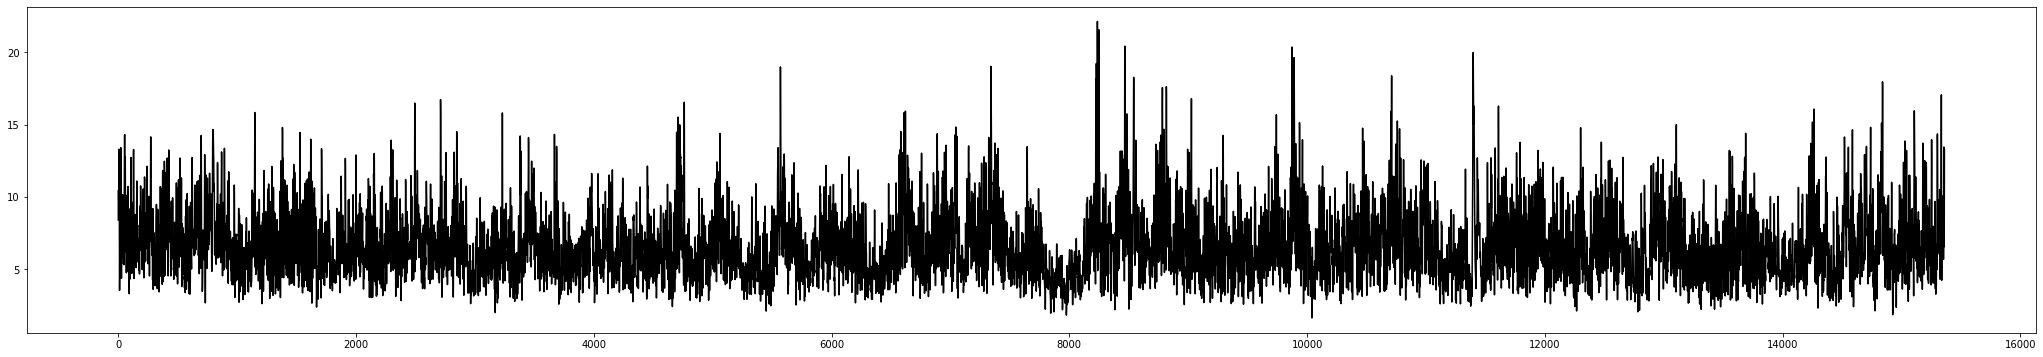

Sujeto: 9

 Período: 1
Shape EEGdata_pre  (30, 7681)
Shape EEGdata_pre  (30, 7681)
Shape EEGdata  (30, 15362)
Dimensionalidad: 15362
Len de output: 15362


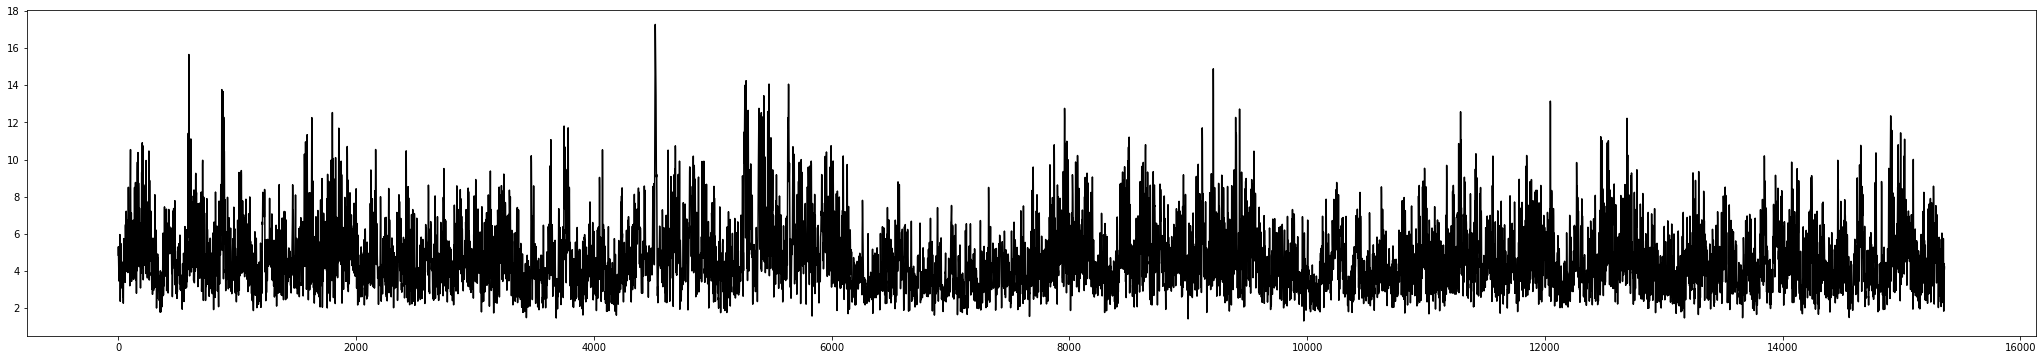

Sujeto: 10

 Período: 1
Shape EEGdata_pre  (30, 7681)
Shape EEGdata_pre  (30, 7681)
Shape EEGdata  (30, 15362)
Dimensionalidad: 15362
Len de output: 15362


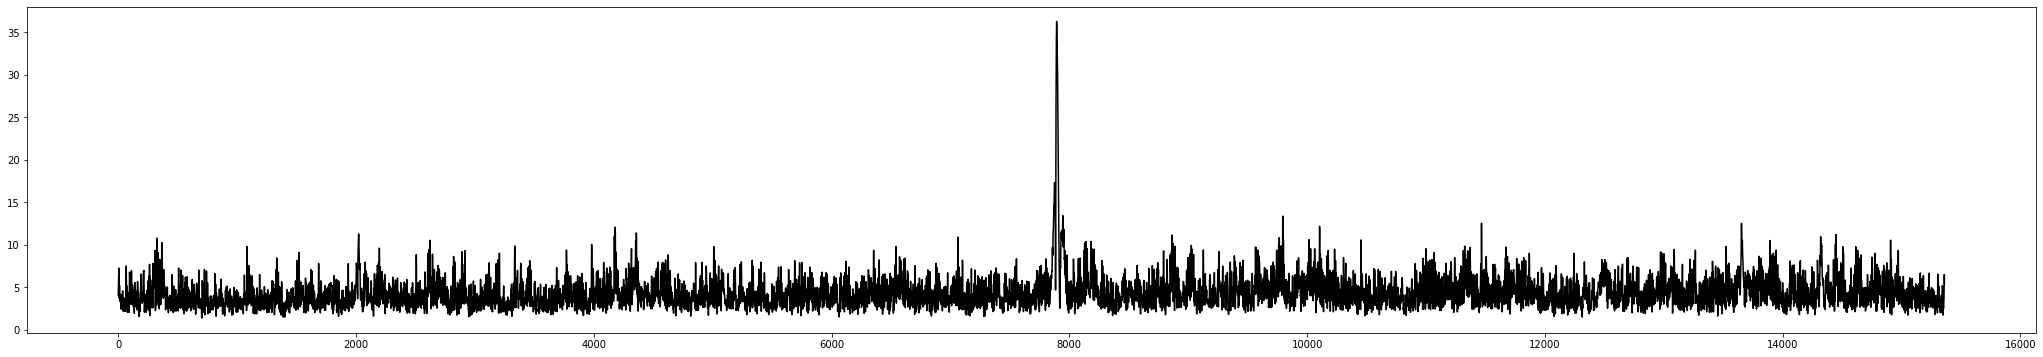

Sujeto: 12

 Período: 1
Shape EEGdata_pre  (30, 7681)
Shape EEGdata_pre  (30, 7681)
Shape EEGdata  (30, 15362)
Dimensionalidad: 15362
Len de output: 15362


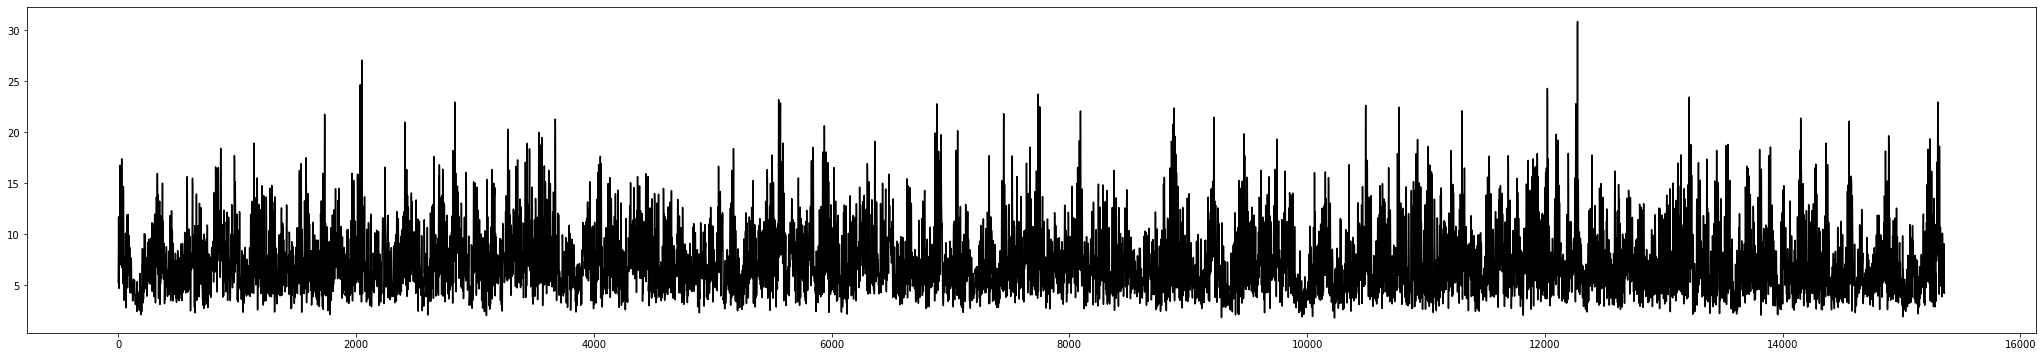

Sujeto: 13

 Período: 1
Shape EEGdata_pre  (30, 7681)
Shape EEGdata_pre  (30, 7681)
Shape EEGdata  (30, 15362)
Dimensionalidad: 15362
Len de output: 15362


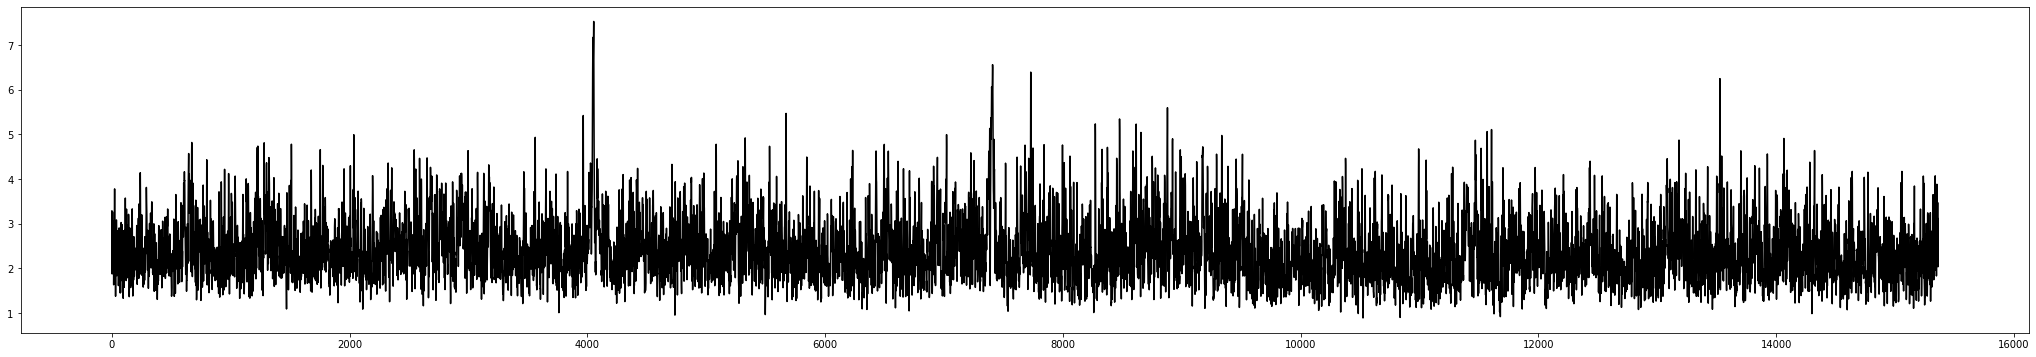

In [47]:
import math

for sujeto in [8, 9, 10, 12, 13]:
  print(f"Sujeto: {sujeto}")

  for act in [1]:#, 2]:
    print(f"\n Período: {act}")
    filename = f'/content/drive/MyDrive/Maestria/2021.04.CyT/TP-grupo-2/procesados/suj_{sujeto}_bl_1.txt'
    datos_pre   = pd.read_csv(filename, sep=',', header=None)
    EEGdata_pre = datos_pre.to_numpy()
    # print("Shape EEGdata_pre ", EEGdata_pre.shape)

    filename = f'/content/drive/MyDrive/Maestria/2021.04.CyT/TP-grupo-2/procesados/suj_{sujeto}_bl_2.txt'
    datos_pos   = pd.read_csv(filename, sep=',', header=None)
    EEGdata_pos = datos_pos.to_numpy()
    # print("Shape EEGdata_pre ", EEGdata_pos.shape)
    
    EEGdata = np.concatenate((EEGdata_pre, EEGdata_pos), axis=1)
    print("Shape EEGdata ", EEGdata.shape)

    ch      = EEGdata.shape[0]
    samples = EEGdata.shape[1] 
    fin     = int(samples/srate)
    espaciado = "\t"
    
    prom_i = EEGdata.mean(axis=0);
    print(f"Dimensionalidad: {len(prom_i)}")

    output = []
    for i in range(0, EEGdata.shape[1]):
      output.append(math.sqrt(
                  sum(
                    [math.pow(
                        (EEGdata[x, i] - prom_i[i]), 2
                      ) 
                      for x in range(0, ch)])
                  / ch))
    print(f"Len de output: {len(output)}")
    # print("output:", output)
    fig,ax=plt.subplots(ncols=1,figsize=(36,6))
    ax.plot(output,'k')
    plt.show()

In [ ]:

    # output_gfp = []
    # Por samples
    # promedio_srate = []
    # # Calcular promedio para cada canal, en el timeframe srate 
    # for i in range(inicio, (fin * srate), srate):
    #   promedio_srate.append([EEGdata[x, i : i + srate].mean() for x in range(0, ch)])
    
    # # Matriz de promedio por canal/srate
    # df_promedio = pd.DataFrame(data=promedio_srate)
    
    # # Promedio vertical para cada instante de tiempo
    # prom_ch = df_promedio.mean(axis=1)

    # print(f"Promedio de canales de los 60 srates: {prom_ch}")
    # print(f"Cantidad de columnas: {df_promedio.shape[0]}")
    # # print("df_promedio")
    # # print(df_promedio)
    # print(f"df.iloc(fila_columna): {df_promedio.iloc[0,1]}")

    # # Para cada instante
    # for tiempo in range(0, df_promedio.shape[0]):
    #   print(espaciado + "Sum data", round(
    #           math.sqrt(
    #               sum(
    #                 [math.pow(
    #                     (df_promedio[ch,tiempo] - prom_ch[tiempo]), 2
    #                   ) 
    #                   for x in range(0, ch)])
    #               / ch)
    #             , 5)
    #        )
    

    # Sin la resta del promedio del instante de tiempo    
    # # print(f'Inicio: {inicio}, fin: {fin}, srate: {srate}, fin-srate: {fin-srate},')
    # for i in range(inicio, (fin * srate), srate):
    #   # print(espaciado + f"inicio: {i}, next_i: {i+srate}")
    #   # print(espaciado + f"Promedio canal-sample: ", [EEGdata[x, i : i + srate].mean() for x in range(0, ch)])
    #   # # print(EEGdata[0, i : i + srate].mean())
    #   # print(espaciado + "Sum data", round(
    #   #         math.sqrt(
    #   #             sum(
    #   #               [math.pow(
    #   #                   (EEGdata[x, i : i + srate].mean()), 2
    #   #                 ) 
    #   #                 for x in range(0, ch)])
    #   #             / ch)
    #   #           , 5)
    #   #      )
    #   output_gfp.append(math.sqrt(
    #                       sum(
    #                         [math.pow(
    #                             (EEGdata[x, i : i + srate].mean()), 2
    #                           ) 
    #                           for x in range(0, ch)])
    #                       / ch)
    #                     )
    # print("output_gfp")
    # print(output_gfp)
    # print(len(output_gfp))
    # # TODO: Falta uno
    
    # # Para cada instante, calcular la función sumando los canales
    # #   sum_ch = sum(ch^2)
    # #   math.sqrt(sum_ch / ch)
    # # for c in np.arange(ch):
    # #   dmin=np.min(EEGdata_filt[c,inicio*srate:fin*srate])
    # #   dmax=np.max(EEGdata_filt[c,inicio*srate:fin*srate])
    # #   vmedio = np.mean([dmin,dmax])+30*c
    # # promedios.append(EEGdata[:,inicio*srate:fin*srate].mean(axis=1))
    